# Reconocimiento Estadistico de Patrones



# Proyecto 1

- Luis Angel Arredondo Uribe


Consulta los precios mensuales historicos de diferentes productos en diferentes ciudades de México. Usa las técnicas vistas en parte 1 y 2 del curso para formular y contestar algunas preguntas de interes.

A lo largo de este proyecto se pretenderá buscar solución a las siguientes preguntas de interés, considerando el análisis de los precios de un producto en particular como lo es el aguacate. Las preguntas de interés serán las siguientes.


 - ¿Existen patrones estacionales?

 - ¿Es posible conseguir agrupaciones informativas de las ciudades?


 - ¿Han existido anomalías en los cambios de los precios en los últimos años?

 - ¿Los cambios en los precios, afectan por igual a todas las zonas de las que se tiene registro?

Comencemos realizando algunas visualizaciones informativas de los datos, las cuales nos ayudarán a encontrar relaciones en los mismos que sirvan como punto de partida para la resolución de las cuestiones planteadas y para comprender los datos, para ello haremos uso del archivo aguacate.CSV con el precio promedio mensual del aguacate en 52 ciudades mexicanas en 2022. Posteriormente el análisis se ampliará a la consideración de muestras tomadas en distintos años, lo cual será crucial para la detección de anomalías en los cambios de los precios a lo largo de los últimos años. Al final se obtendrá un análisis perfectamente aplicable a conjuntos de datos pertenecientes a otros productos.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Leemos los datos
prices = pd.read_csv("/content/drive/MyDrive/aguacate2022.CSV", index_col=None, sep=',', encoding='latin-1')

pricesByYear = pd.read_csv("/content/drive/MyDrive/aguacate_08,18_03,24.CSV", index_col=None, sep=',', encoding='latin-1', on_bad_lines='skip')

La base de datos considerada es la siguiente.

In [ ]:
prices.head()

,Año,Mes,Fecha_Pub_DOF,Clave ciudad,Nombre ciudad,División,Grupo,Clase,Subclase,Clave genérico,Genérico,Consecutivo,Especificación,Precio promedio,Cantidad,Unidad,Estatus
0,2022,12,24/01/2023 00:00,1,Área Met. de la Cd. de México,"1. Alimentos, bebidas y tabaco",1.1. Alimentos,1.1.6. Frutas y hortalizas,16 Frutas frescas,46,Aguacate,1,"HASS, A GRANEL ...",60.63,1,KG,NaN
1,2022,12,24/01/2023 00:00,1,Área Met. de la Cd. de México,"1. Alimentos, bebidas y tabaco",1.1. Alimentos,1.1.6. Frutas y hortalizas,16 Frutas frescas,46,Aguacate,2,"HASS, A GRANEL ...",44.33,1,KG,NaN
2,2022,12,24/01/2023 00:00,1,Área Met. de la Cd. de México,"1. Alimentos, bebidas y tabaco",1.1. Alimentos,1.1.6. Frutas y hortalizas,16 Frutas frescas,46,Aguacate,3,"HASS, A GRANEL ...",48.75,1,KG,NaN
3,2022,12,24/01/2023 00:00,1,Área Met. de la Cd. de México,"1. Alimentos, bebidas y tabaco",1.1. Alimentos,1.1.6. Frutas y hortalizas,16 Frutas frescas,46,Aguacate,4,"HASS, A GRANEL ...",81.25,1,KG,NaN
4,2022,12,24/01/2023 00:00,1,Área Met. de la Cd. de México,"1. Alimentos, bebidas y tabaco",1.1. Alimentos,1.1.6. Frutas y hortalizas,16 Frutas frescas,46,Aguacate,5,"HASS, A GRANEL ...",59.90,1,KG,NaN


Para poder manejar los datos, retiramos las columnas que no son de interés.

In [ ]:
usefull=prices.drop(columns=['Fecha_Pub_DOF', 'División', 'Clase', 'Subclase', 'Clave genérico', 'Cantidad', 'Unidad', 'Estatus', 'Especificación', 'Grupo', 'Genérico']).copy()
usefull.head()

,Año,Mes,Clave ciudad,Nombre ciudad,Consecutivo,Precio promedio
0,2022,12,1,Área Met. de la Cd. de México,1,60.63
1,2022,12,1,Área Met. de la Cd. de México,2,44.33
2,2022,12,1,Área Met. de la Cd. de México,3,48.75
3,2022,12,1,Área Met. de la Cd. de México,4,81.25
4,2022,12,1,Área Met. de la Cd. de México,5,59.90


Dado que de cada ciudad, para cada mes se tiene una cantidad de promedios distinta, procedemos a tomar la mediana de dichos promedios, para así tener 12 medianas de cada ciudad (Uno por mes).

In [ ]:
#Ajustamos los índices por clave de ciudad y mes, lo cual será útil para acceder
# de forma más concisa a las filas de interés
usefull.set_index(['Clave ciudad', 'Mes'], inplace = True)

In [ ]:
#Lista que contendrá los promedios de cada ciudad en cada fila
cityMeans=[]

for i in range(1, 56):
    cityMeans.append([])
    for j in range(1,13):
        cityMeans[i-1].append(usefull.loc[(i,j), 'Precio promedio'].median())

<ipython-input-556-81bf13217ec7>:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  cityMeans[i-1].append(usefull.loc[(i,j), 'Precio promedio'].median())
<ipython-input-556-81bf13217ec7>:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  cityMeans[i-1].append(usefull.loc[(i,j), 'Precio promedio'].median())
<ipython-input-556-81bf13217ec7>:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  cityMeans[i-1].append(usefull.loc[(i,j), 'Precio promedio'].median())
<ipython-input-556-81bf13217ec7>:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  cityMeans[i-1].append(usefull.loc[(i,j), 'Precio promedio'].median())
<ipython-input-556-81bf13217ec7>:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  cityMeans[i-1].append(usefull.loc[(i,j), 'Precio promedio'].median())
<ipython-input-556-81bf13217ec7>:7: PerformanceWarning: indexing past lexsort depth may impact perfo

Procedemos ahora a crear el dataframe con los datos resultantes.

In [ ]:
#Creamos el dataframe con los datos
data = pd.DataFrame(cityMeans)
data.columns = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
data.head()


,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,72.40,80.00,86.250,100.000,115.000,125.00,100.000,91.50,77.500,65.000,62.50,60.000
1,54.29,63.50,68.965,89.115,99.475,93.35,82.125,63.34,54.655,43.865,40.00,42.800
2,62.79,68.75,74.375,84.375,96.925,100.00,93.750,76.25,67.250,53.125,49.00,47.675
3,66.25,70.00,82.500,97.250,104.000,108.75,102.500,89.00,73.480,61.500,58.75,53.700
4,74.90,87.15,98.750,107.500,120.000,137.50,120.000,97.65,81.250,66.750,64.00,55.480


Apreciamos a continuación cómo variaron los precios de las distintas ciudades a lo largo del año, lo cual será útil para comenzar a comprender el comportamiento de los precios a lo largo de este año.

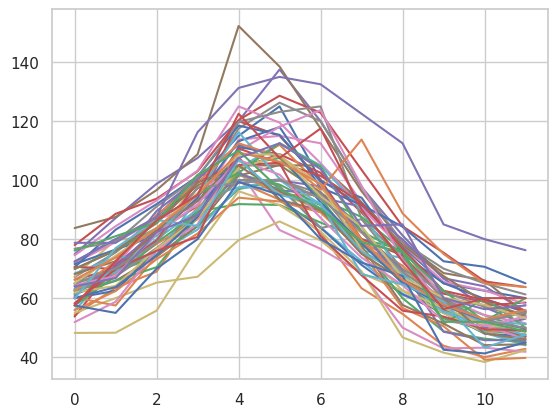

In [ ]:

fig, ax = plt.subplots()
# Iterar sobre cada ciudad de los datos
for ciudad in cityMeans:
    # Graficar una línea para cada fila
    ax.plot(ciudad)

# Mostrar el gráfico
plt.show()

Donde de primera instancia ya podemos apreciar que el precio tuvo una tendencia a la alta a mediados de año y precios bajos al principio y fin de año. En conjunto con este gráfico, veamos el siguiente box plot para distinguir de forma más precisa el comportamiento de los precios por mes.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Enero'),
  Text(1, 0, 'Febrero'),
  Text(2, 0, 'Marzo'),
  Text(3, 0, 'Abril'),
  Text(4, 0, 'Mayo'),
  Text(5, 0, 'Junio'),
  Text(6, 0, 'Julio'),
  Text(7, 0, 'Agosto'),
  Text(8, 0, 'Septiembre'),
  Text(9, 0, 'Octubre'),
  Text(10, 0, 'Noviembre'),
  Text(11, 0, 'Diciembre')])

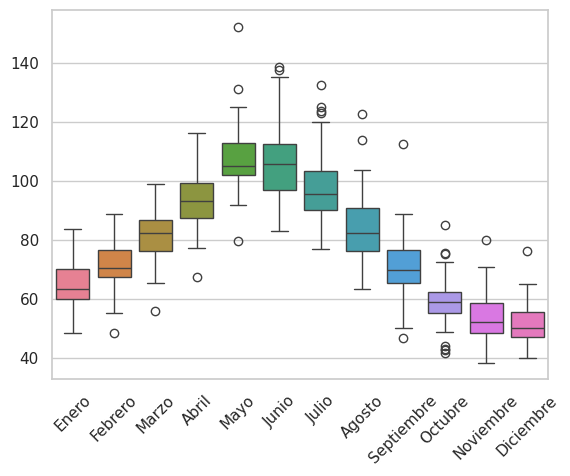

In [ ]:
sns.boxplot( data=data)
plt.xticks(rotation=45)

Como se puede apreciar, cada boxplot representa un mes del año en cuestión, con los precios del aguacate de las 55 ciudades. La linea dentro de cada box
representa la mediana del precio del aguacate. Se pueden apreciar los comportamientos de los precios, por ejemplo, en el mes de enero, el 50 porciento de los precios se encuentra en un rango aproximado de 60 y 70 pesos y una mediana de aproximadamente 63 pesos. Además se puede apreciar una mayor varianza de los precios en los meses de medio año, tal es el caso del mes de junio que presenta una mayor varianza de los precios y los meses de principio y fin de año se caracterizan por contar con varianzas relativamente bajas de los precios, tal es el caso del mes de octubre que presenta la menor variabilidad de los precios a lo largo del año.
Notemos que además se presentan datos atípicos, en la primera mitad del año, dichos datos parecieron encontrarse muy por debajo de los precios del resto de las ciudades, estos datos pertenecen a la ciudad de Jacona, Michiacán, y en los últimos meses se aprecian precios muy por encima de la media, correspondientes a Tehuantepec, Oaxaca, estos últimos datos siendo producto de la alta inflación registrada en el año 2022 de la cual se puede obtener más información en el siguiente enlace:

[Tehuantepec y Oaxaca entre las 6 ciudades más caras del país en 2022.]( https://imparcialoaxaca.mx/oaxaca/679045/tehuantepec-y-oaxaca-entre-las-6-ciudades-mas-caras-del-pais/)

Además, podemos también notar que los bajos precios de Jacona, Michoacán son producto de que en 2022, Michoacán ocupó el mayor volumen de producción de aguacate a nivel nacional, lo cual se muestra en la siguiente gráfica.

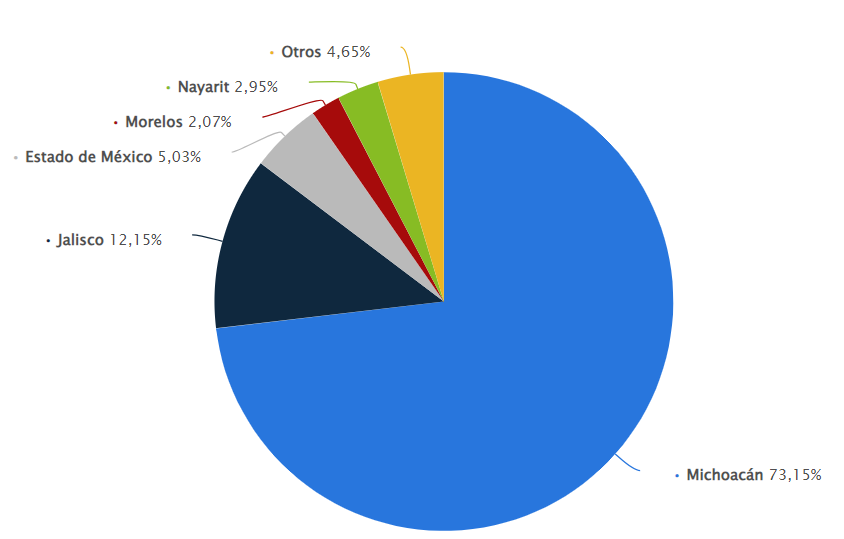

Y veamos el siguiente pairplot para comenzar a distinguir relaciones.

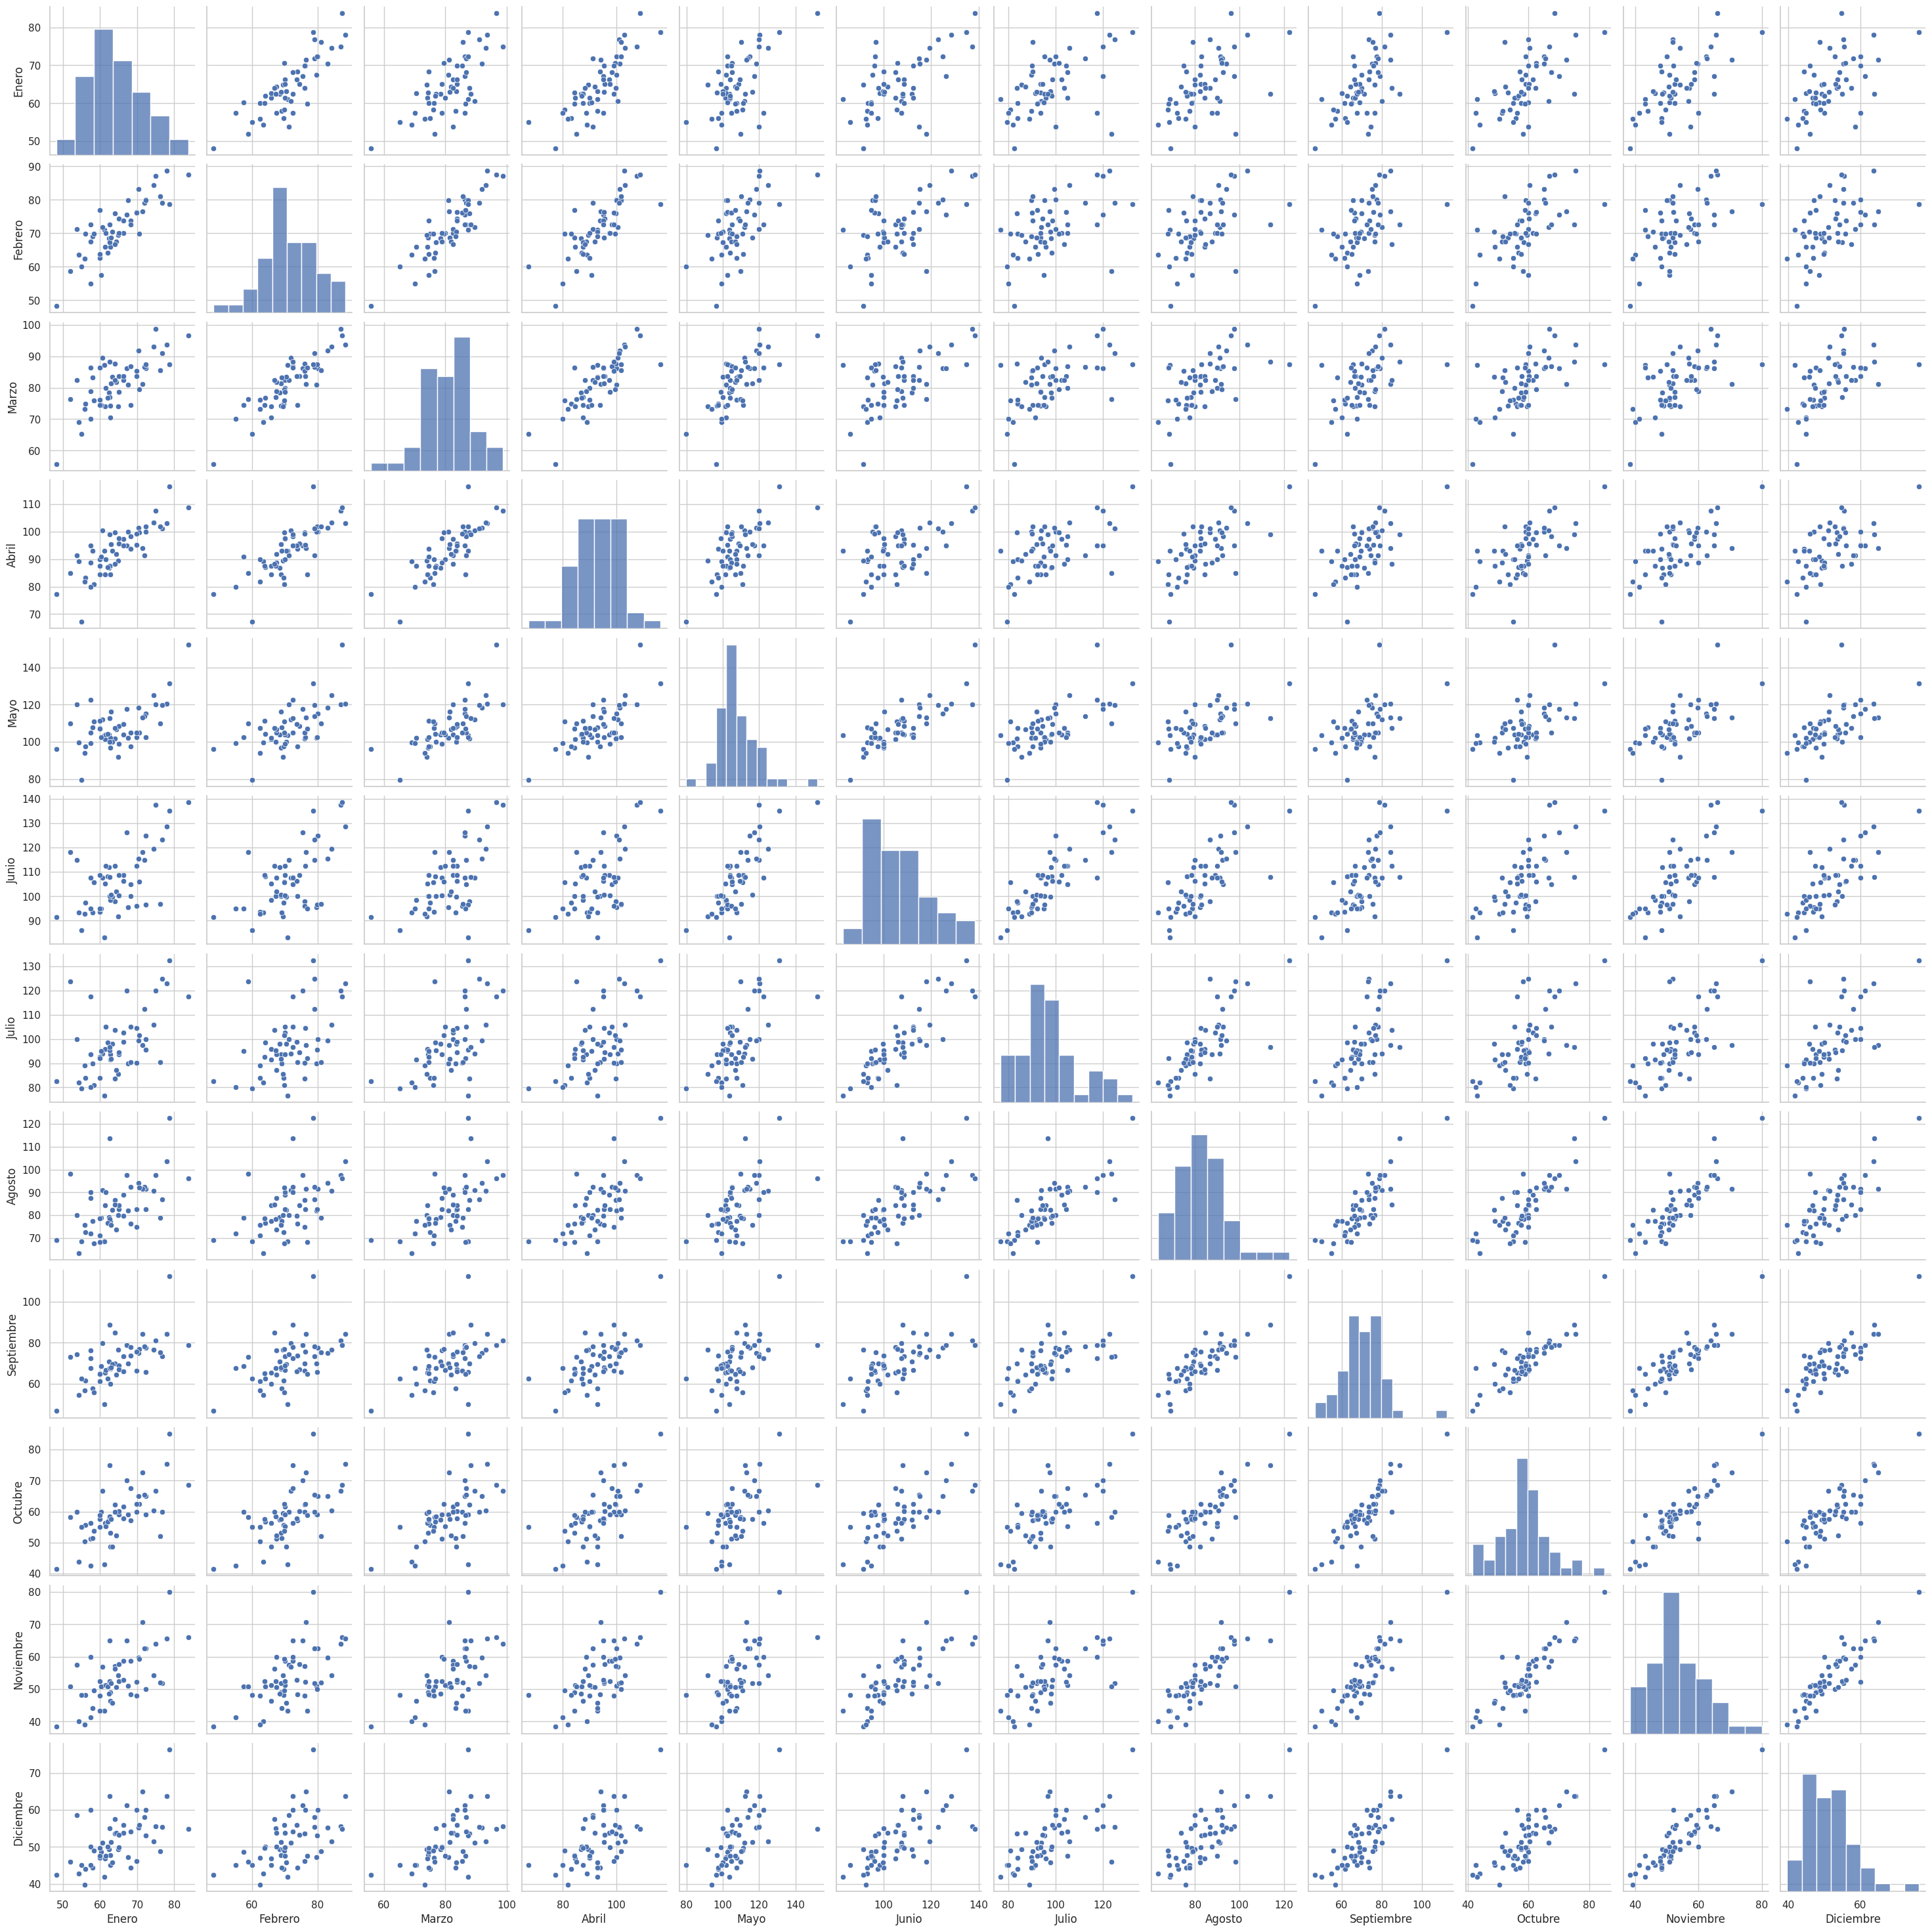

In [ ]:
sns.pairplot(data)

Donde aparentemente existen tendencias a relaciones lineales entre meses consecutivos.  Ahora procederemos a emplear Isomap para reducir la dimensión de los datos. Lo cual a su vez nos mostrará ciertos aspectos globales de los datos y con lo cual esperaríamos que se distinga la posición de los datos atípicos en relación al resto de los datos, entre algunas otras características.

In [ ]:
# Aplicar Isomap a los datos
isomap = Isomap(n_components=2, n_neighbors=10)
d_low = isomap.fit_transform(cityMeans)

<ipython-input-562-e3416b0e773b>:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  ciudades.append(usefull.loc[(i,1), 'Nombre ciudad'].drop_duplicates().copy()[(i,1)])


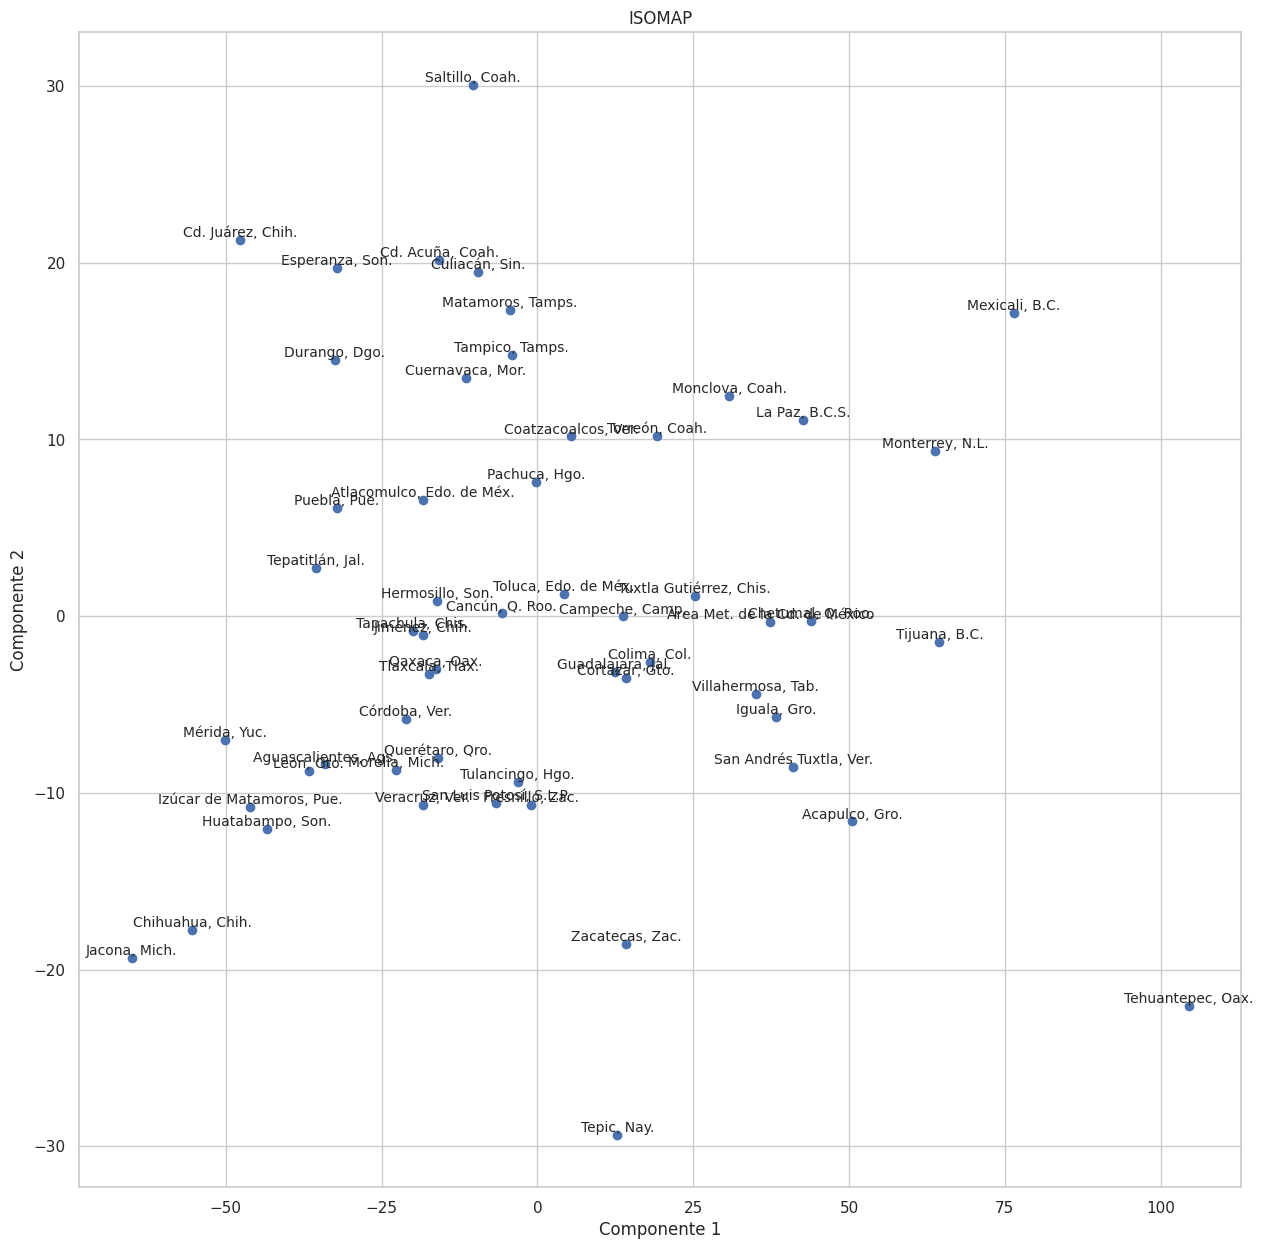

In [ ]:
#Extraemos los nombres de las ciudades para usarlos como etiquetas
ciudades = []
for i in range(1, 56):
    ciudades.append(usefull.loc[(i,1), 'Nombre ciudad'].drop_duplicates().copy()[(i,1)])


# Crear el scatter plot
plt.figure(figsize=(15, 15))
plt.scatter(d_low[:, 0], d_low[:, 1])

# Agregar las etiquetas sobre los puntos
for i, ciudad in enumerate(ciudades):
    plt.text(d_low[i, 0], d_low[i, 1], str(ciudad), fontsize=10, ha='center', va='bottom')

# Añadir etiquetas a los ejes y título
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('ISOMAP')

# Mostrar el gráfico
plt.show()

Donde note que las ciudades que se muestran del lado derecho son aquellas que mantuvieron los precios más altos a lo largo del año, lo cual se muestra a continuación, donde se destacan los precios a lo largo del año para Mexicali, Monterrey, Tijuana y Tehuantepec.

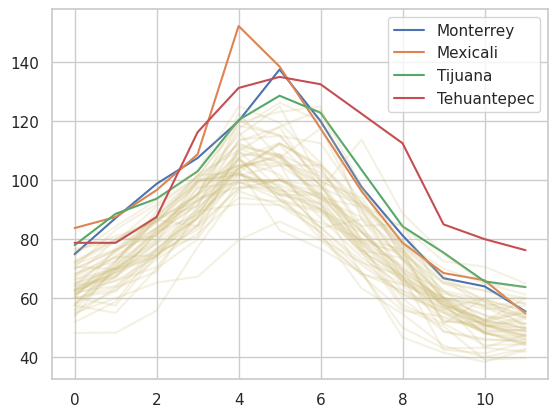

In [ ]:

etiquetas = {
    5: "Mexicali",
    4: "Monterrey",
    23: "Tijuana",
    44:"Tehuantepec"
}
fig, ax = plt.subplots()

for i, ciudad in enumerate(cityMeans):
    if i in etiquetas:
        ax.plot(ciudad, label=etiquetas[i])
    else:
        ax.plot(ciudad, 'y', alpha=0.2)


# Mostrar el gráfico
plt.legend()
plt.show()

Además note que los precios de las ciudades posicionadas a la izquierda mantuvieron los precios más bajos a lo largo del año, lo cual se muestra a continuación, donde se destacan las curvas de precios de Jacona, Chihuahua, Mérida y ciudad Juárez.

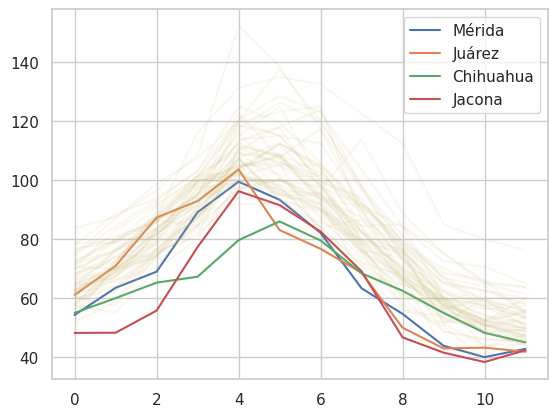

In [ ]:
etiquetas = {
    28: "Jacona",
    18: "Chihuahua",
    1: "Mérida",
    6: "Juárez"
}
fig, ax = plt.subplots()

for i, ciudad in enumerate(cityMeans):
    if i in etiquetas:
        ax.plot(ciudad, label=etiquetas[i])
    else:
        ax.plot(ciudad, 'y', alpha=0.1)


# Mostrar el gráfico
plt.legend()
plt.show()

Para la siguiente visualización, hagamos uso de PCA y veamos cuánta es la varianza explicada por las direcciones principales para considerar si es suficiente tomar las primeras dos.



Varianza explicada por las 2 primeras direcciones principales: 0.8066936915557965


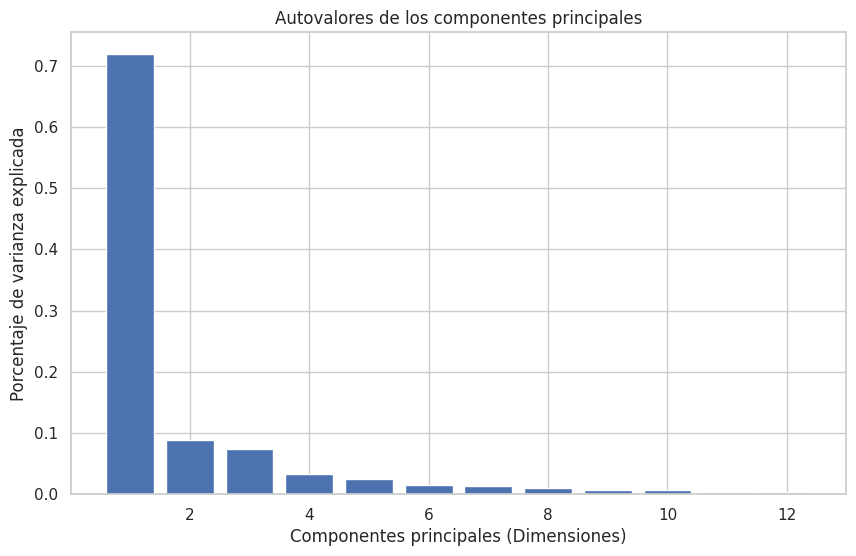

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Ahora exploraremos los datos con PCA
pca = PCA()
res_pca = pca.fit_transform(data)
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, align='center')
plt.ylabel('Porcentaje de varianza explicada')
plt.xlabel('Componentes principales (Dimensiones)')
plt.title('Autovalores de los componentes principales')

#Se muestra la varianza explicada ante el uso de las 2 primeras direcciones principales
print("Varianza explicada por las 2 primeras direcciones principales:",pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1])
plt.show()

Con esta visualización podemos apreciar que al emplear las primeras 2 direcciones principales podemos preservar aproximadamente el 80% de la varianza de los datos en su dimensión original, por lo que tiene sentido trabajar con las primeras 2 direcciones principales, con lo cual se obtiene lo siguiente.

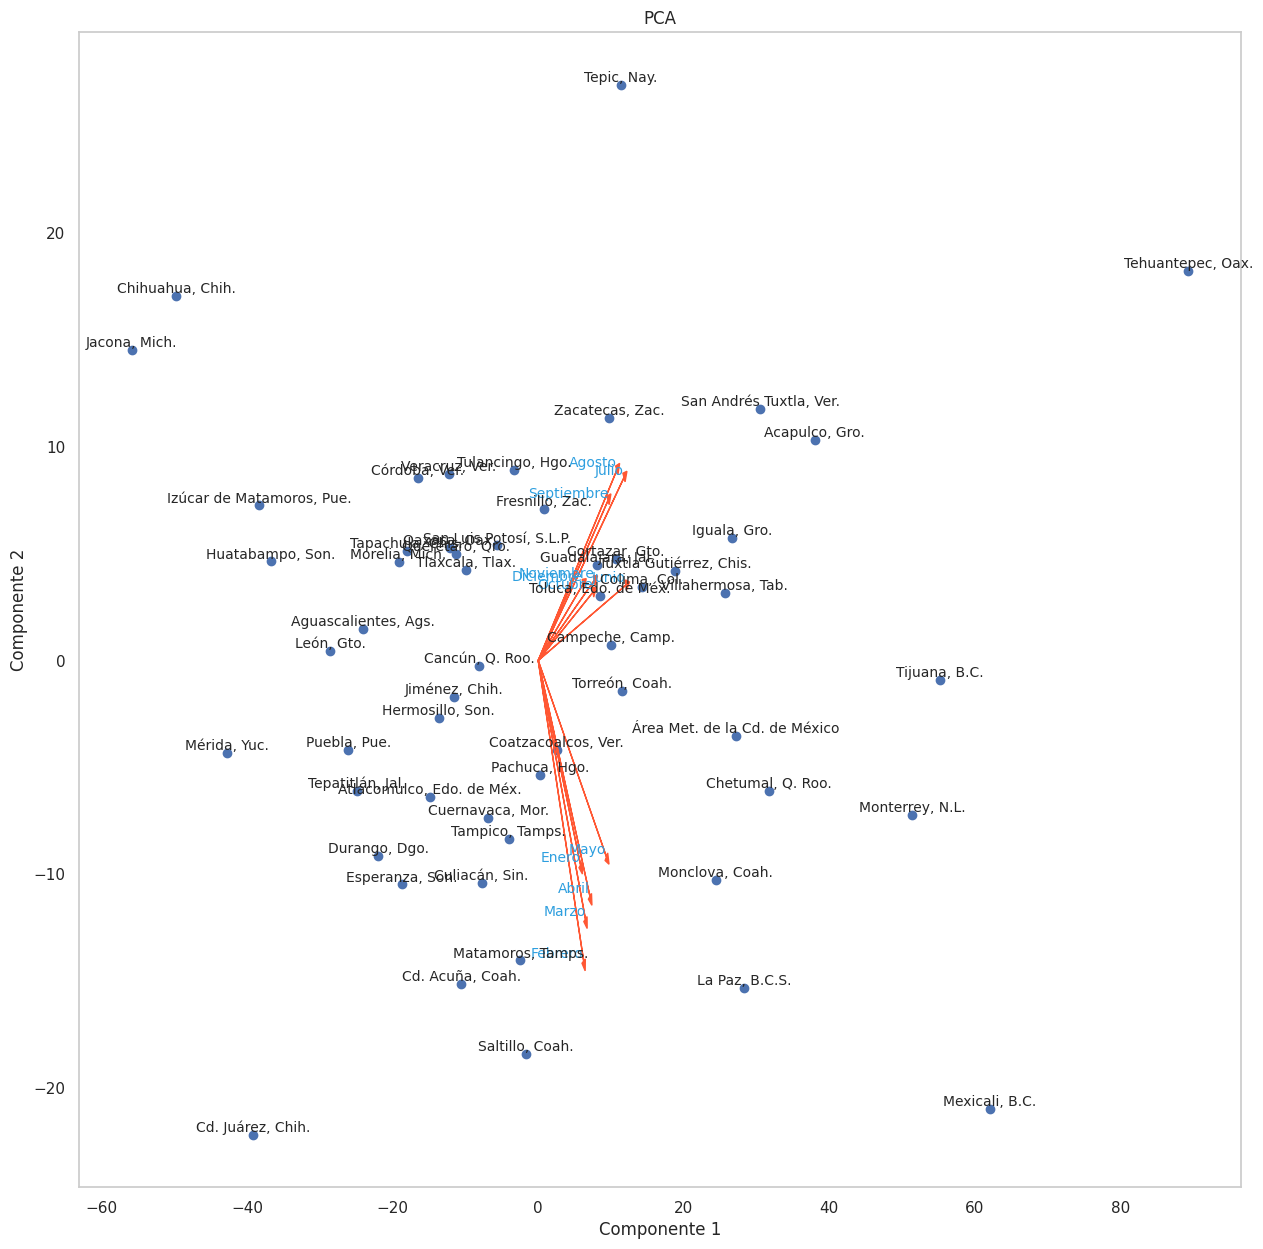

In [ ]:
# Crear el scatter plot
plt.figure(figsize=(15, 15))
plt.scatter(res_pca[:, 0], res_pca[:, 1])

# Agregar flechas para las variables
for i, var in enumerate(pca.components_.T):
    plt.arrow(0, 0, 30*var[0], 30*var[1], head_width=0.5, head_length=0.5, linewidth=1, color='#FF5733')
    plt.text(30*var[0], 30*var[1], data.columns[i], fontsize='10', ha='right', va='bottom', color='#2E9FDF')

# Agregar las etiquetas sobre los puntos
for i, ciudad in enumerate(ciudades):
    plt.text(res_pca[i, 0], res_pca[i, 1], str(ciudad), fontsize=10, ha='center', va='bottom')

# Añadir etiquetas a los ejes y título
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('PCA')
plt.grid()
# Mostrar el gráfico
plt.show()

Donde podemos notar un comportamiento similar al de ISOMAP ya que ambos son métodos de reducción de dimensión que muestran las relaciones globales de los datos, entonces de nuevo podemos apreciar que las ciudades con precios más bajos a lo largo del año se encuentran del lado izquierdo, mientras que las ciudades con precios altos se encuentran a la derecha.

Continuando con el análisis, procedamos aplicando algunos métodos de clustering con el fin de notar si las agrupaciones resultantes guardan cierta relación con la información descrita en las visualizaciones anteriores, comencemos entonces empleando el método de agrupamiento jerárquico aplicado a los datos obtenidos tras aplicar PCA.

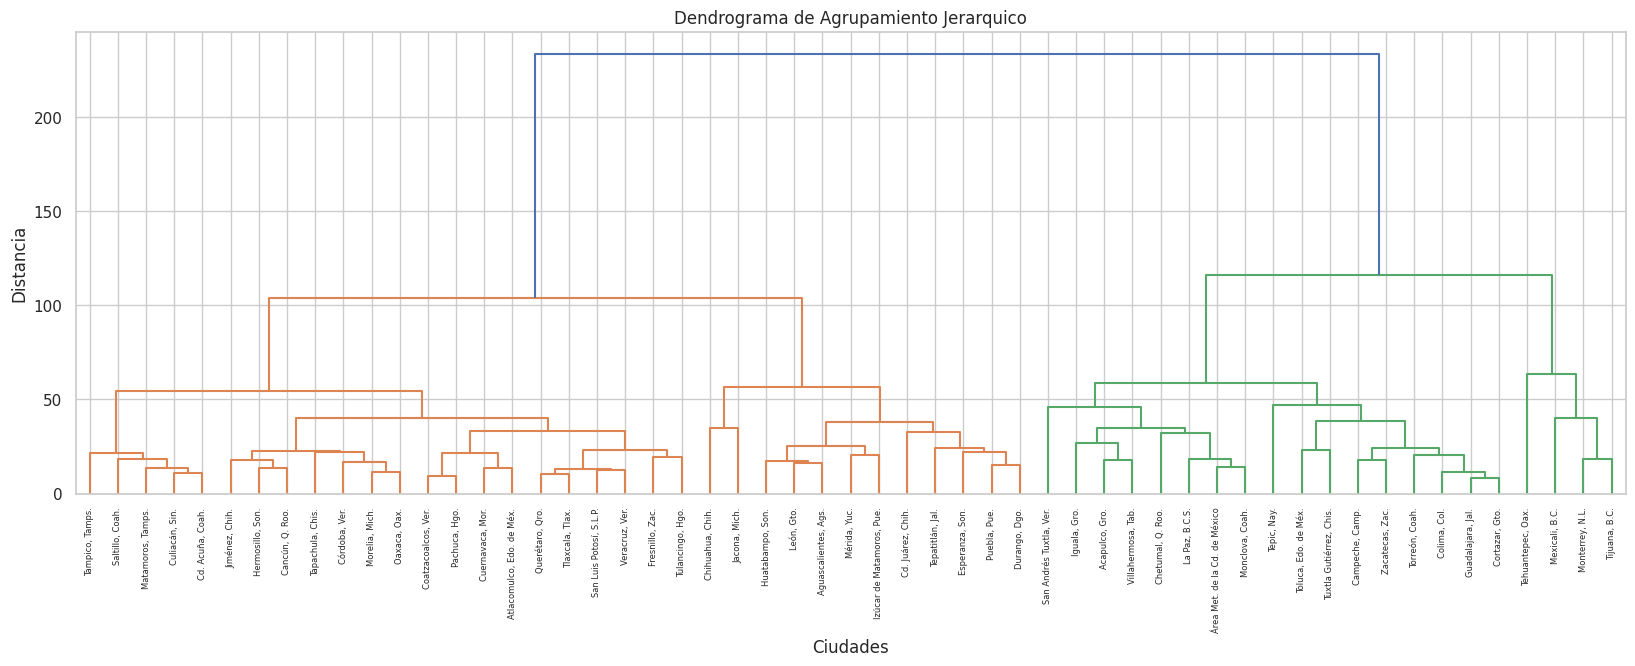

In [ ]:


import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
# Realizamos el agrupamiento jerarquico
Z = linkage(res_pca, 'ward')

# Dibujamos el dendrograma
plt.figure(figsize=(20, 6))
plt.title('Dendrograma de Agrupamiento Jerarquico')
plt.xlabel('Ciudades')
plt.ylabel('Distancia')
dendrogram(Z, labels = ciudades)
plt.show()

Separamos los clusters a partir de la distancia igual a 70 para obtener 4 clusters y ploteamos de nuevo los datos (tras PCA) pero esta vez, por color según el cluster al que pertenecen con base en el resultado lo anterior.

In [ ]:
from scipy.cluster.hierarchy import fcluster

clusters = fcluster(Z, 70, criterion='distance')

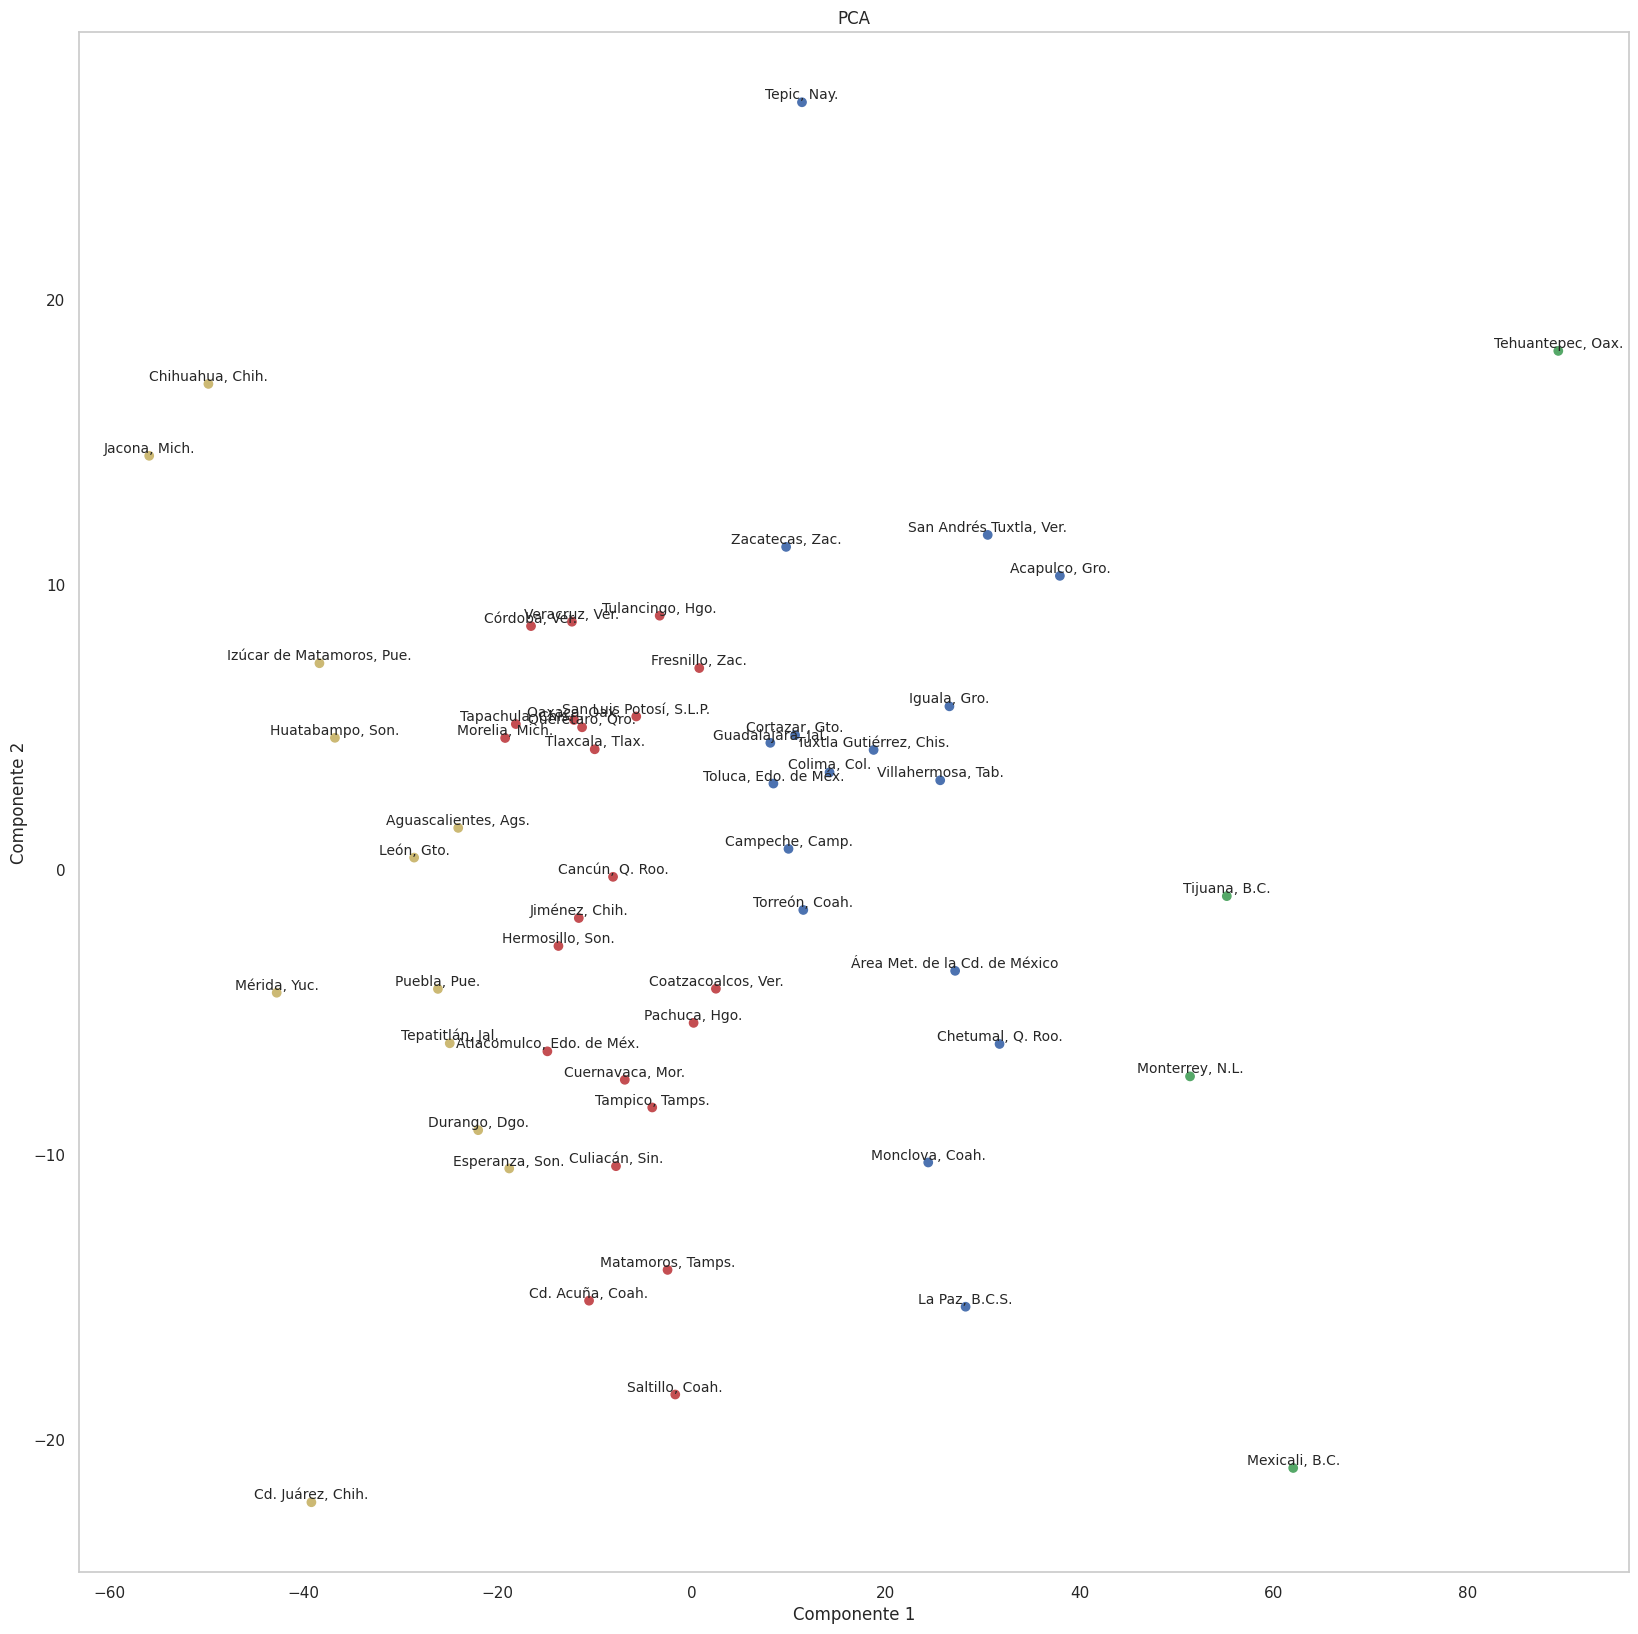

In [ ]:
# Crear el scatter plot
colors=['r',
       'y',
       'b',
       'g']
colorsPlot = []
for i in range(55):
    colorsPlot.append(colors[clusters[i]-1])
plt.figure(figsize=(20, 20))
plt.scatter(res_pca[:, 0], res_pca[:, 1], c=colorsPlot)



# Agregar las etiquetas sobre los puntos
for i, ciudad in enumerate(ciudades):
    plt.text(res_pca[i, 0], res_pca[i, 1], str(ciudad),  fontsize=10, ha='center', va='bottom')

# Añadir etiquetas a los ejes y título
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('PCA')
plt.grid()
# Mostrar el gráfico
plt.show()

Donde aparentemente hemos obtenido una agrupación de las ciudades con base en qué tan alto fue el precio del aguacate a lo largo del año, por ejemplo, el cluster representado con puntos verdes contiene a las ciudades con precios más altos, el de puntos amarillos, a las ciudades con precios más bajos, y para los clusters rojo y azul, a las ciudades con precios medios bajos y medios altos respectivamente, y se puede apreciar una buena separación de los mismos.

Procedamos ahora a considerar datos de distintos años, para lo cual haremos un preprocesamiento de dichos datos igual al caso anterior para cada año y posteriormente, para los datos de cada ciudad, haremos el cálculo de la media, para obtener así, de cada año, 55 características una perteneciente a cada ciudad.
Posteriormente construimos el dataframe, para aplicar PCA a los datos, evaluar si la cantidad de varianza descrita por las primeras 2 componentes principales es suficiente y si lo es, visualizar los datos en el nuevo espacio para determinar si en algún año en particular se presentó alguna anomalía en los precios del aguacate.

In [ ]:
usefull=pricesByYear.drop(columns=['Fecha_Pub_DOF', 'División', 'Clase', 'Subclase', 'Clave genérico', 'Cantidad', 'Unidad', 'Estatus', 'Especificación', 'Grupo', 'Genérico']).copy()
#Ajustamos los índices por clave de ciudad y mes, lo cual será útil para acceder
# de forma más concisa a las filas de interés
usefull.set_index(['Año','Clave ciudad'], inplace = True)
años = [2018, 2019, 2020, 2021, 2022, 2023, 2024]
#Lista que contendrá los promedios de cada ciudad en cada fila
cityMeansByYear=[]
for i, year in enumerate(años):
    cityMeansByYear.append([])
    for j in range(1, 56):
        cityMeansByYear[i].append(usefull.loc[(year,j), 'Precio promedio'].median())
globalData = pd.DataFrame(cityMeansByYear)
globalData.columns = ciudades
globalData.index = años
globalData.head()

<ipython-input-570-de2cd720b6d2>:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  cityMeansByYear[i].append(usefull.loc[(year,j), 'Precio promedio'].median())
<ipython-input-570-de2cd720b6d2>:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  cityMeansByYear[i].append(usefull.loc[(year,j), 'Precio promedio'].median())
<ipython-input-570-de2cd720b6d2>:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  cityMeansByYear[i].append(usefull.loc[(year,j), 'Precio promedio'].median())
<ipython-input-570-de2cd720b6d2>:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  cityMeansByYear[i].append(usefull.loc[(year,j), 'Precio promedio'].median())
<ipython-input-570-de2cd720b6d2>:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  cityMeansByYear[i].append(usefull.loc[(year,j), 'Precio promedio'].median())
<ipython-input-570-de2cd720b6d2>:11: PerformanceWarning: ind

,Área Met. de la Cd. de México,"Mérida, Yuc.","Morelia, Mich.","Guadalajara, Jal.","Monterrey, N.L.","Mexicali, B.C.","Cd. Juárez, Chih.","Acapulco, Gro.","Culiacán, Sin.","León, Gto.",...,"Cd. Acuña, Coah.","Atlacomulco, Edo. de Méx.","Cancún, Q. Roo.","Coatzacoalcos, Ver.","Esperanza, Son.","Izúcar de Matamoros, Pue.","Pachuca, Hgo.","Saltillo, Coah.","Tuxtla Gutiérrez, Chis.","Zacatecas, Zac."
2018,56.90,35.800,49.875,54.230,55.730,61.250,39.035,60.000,53.600,50.500,...,45.250,55.000,51.730,53.750,49.250,45.000,52.565,49.000,45.000,49.250
2019,60.00,38.115,53.400,53.115,64.745,64.125,45.725,65.875,56.215,54.875,...,55.275,58.750,53.330,54.625,51.110,47.890,59.150,50.455,56.875,53.175
2020,58.95,42.125,50.000,54.335,61.125,60.250,45.990,61.165,56.480,49.375,...,54.425,50.690,55.275,52.370,49.290,44.580,56.600,51.895,51.875,51.125
2021,63.75,44.500,52.500,60.425,65.320,69.250,46.415,61.740,55.945,53.540,...,55.865,58.750,54.475,52.990,50.040,49.100,57.500,54.870,55.175,56.650
2022,81.89,53.750,70.140,79.200,85.290,91.000,69.995,84.375,81.825,71.875,...,77.270,74.325,79.090,78.745,75.815,69.375,77.500,79.485,77.980,80.625


Varianza explicada por las 2 primeras direcciones principales: 0.9592194896606748


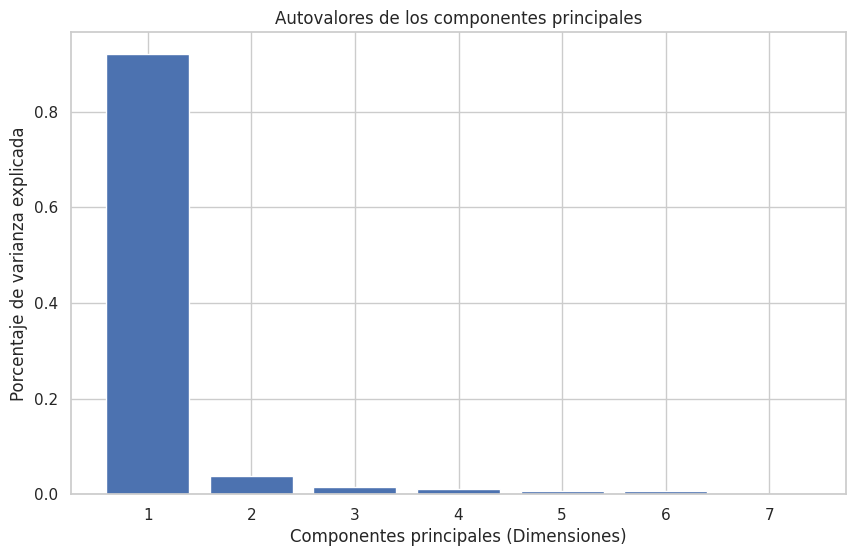

In [ ]:

pca = PCA()
res_pca = pca.fit_transform(globalData)
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, align='center')
plt.ylabel('Porcentaje de varianza explicada')
plt.xlabel('Componentes principales (Dimensiones)')
plt.title('Autovalores de los componentes principales')

#Se muestra la varianza explicada ante el uso de las 2 primeras direcciones principales
print("Varianza explicada por las 2 primeras direcciones principales:",pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1])
plt.show()

Podemos apreciar que la varianza explicada con el uso de las 2 primeras direcciones principales es considerablemente alta, por encima del 95%, por ende la siguiente visualización caracteriza una buena representación de la varianza de los datos en su dimensión original.

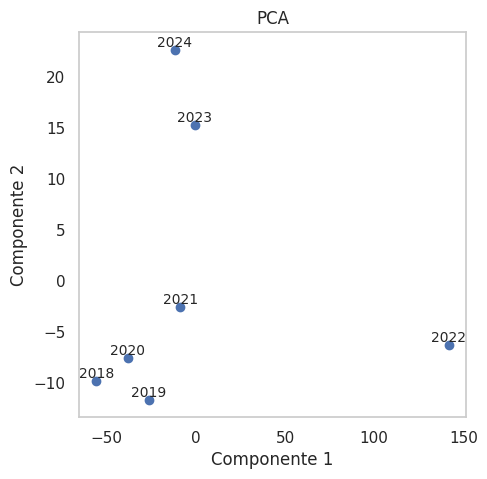

In [ ]:
# Crear el scatter plot
plt.figure(figsize=(5, 5))
plt.scatter(res_pca[:, 0], res_pca[:, 1])

# Agregar las etiquetas sobre los puntos
for i, ciudad in enumerate(años):
    plt.text(res_pca[i, 0], res_pca[i, 1], str(ciudad), fontsize=10, ha='center', va='bottom')

# Añadir etiquetas a los ejes y título
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('PCA')
plt.grid()
# Mostrar el gráfico
plt.show()

Note que el año 2022 guarda cierto comportamiento atípico con respecto a los demás años con base en la información descrita por el primer componente principal, el cual por lo visto anteriormente es el que captura la mayor parte de la varianza de los datos, por lo que en efecto dicho comportamiento debería ser informativo, y es que esta anomalía puede apreciarse a continuación, en donde mostramos las curvas de las medianas de los precios de cada ciudad por año.

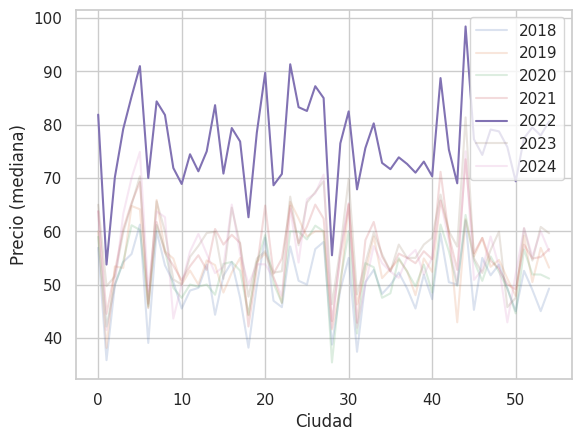

In [ ]:
fig, ax = plt.subplots()
# Iterar sobre cada ciudad de los datos
for i, año in enumerate(cityMeansByYear):
    # Graficar una línea para cada fila
    if i != 4:
        ax.plot(año, label=años[i], alpha=0.2)
    else:
        ax.plot(año, label=años[i])

# Mostrar el gráfico
plt.legend()
plt.xlabel('Ciudad')
plt.ylabel('Precio (mediana)')
plt.show()

Aparentemente las medianas de los precios en el 2022 se encuentran muy por encima de los datos capturados para cada ciudad en el resto de los años y dado que anteriormente ya se mostró que en junio de ese año se tuvo el mayor precio anual registrado, podemos afirmar que en dicho mes el precio del aguacate alcanzó un aumento histórico al menos en los años de los que se tiene registro en este análisis, este hecho puede corrobrarse en el siguiente enlace:

- [Precio del aguacate en México por los cielos en 2022](https://producepay.com/es/resources/precio-del-aguacate-en-mexico-por-los-cielos-en-2022/#:~:text=Mientras%20tanto%2C%20el%20precio%20promedio,estos%20siguen%20esta%20misma%20tendencia.)

Y es que en ese año, el mes con el mayor precio promedio nacional fue registrado en junio con \$94.88/kg, un incremento del 96.2% respecto a los \$48.37/kg de junio del 2021 y 65.0% más respecto a los $59.33/kg de agosto del 2021, mes con el mayor precio promedio de ese año.
Además, en la visualización anterior es posible apreciar un comportamiento muy particualar, el cual se vuelve más evidente si normalizamos los datos, lo cual se muestra a continuación.

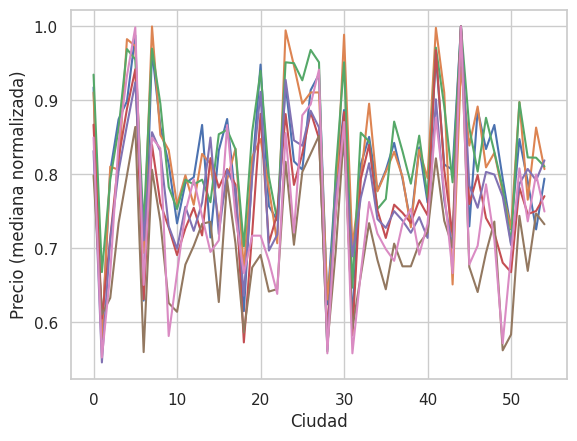

In [ ]:
#Normalizamos los datos
cityMeansByYear = np.array(cityMeansByYear)
datos_normalizados = cityMeansByYear / cityMeansByYear.max(axis=1, keepdims=True)


fig, ax = plt.subplots()
# Iterar sobre cada ciudad de los datos
for i, año in enumerate(datos_normalizados):
    # Graficar una línea para cada fila
    ax.plot(año, label=años[i])

# Mostrar el gráfico
plt.xlabel('Ciudad')
plt.ylabel('Precio (mediana normalizada)')
plt.show()

Note que año con año, independientemente de las anomalías y demás cambios en los precios del aguacate, las medianas de los precios de cada ciudad se comportan de forma muy similar en relación con las medianas de las demás ciudades, lo cual es evidencia de las dependencias existentes en los precios entre las distintas zonas del país, es decir, que aparentemente, ante las fluctuaciones en los precios, el impacto se aprecia en todas las zonas del país en magnitudes proporcionales y a su vez podemos notar  que en general,  el precio es en algunas ciudades mayor o menor que en otras año con año de forma constante.   
Veamos además la curva de precios promedio para cada año, para concluir si en efecto existen tendencias estacionales.

In [ ]:
usefull=pricesByYear.drop(columns=['Fecha_Pub_DOF', 'División', 'Clase', 'Subclase', 'Clave genérico', 'Cantidad', 'Unidad', 'Estatus', 'Especificación', 'Grupo', 'Genérico']).copy()
usefull.set_index(['Año', 'Clave ciudad', 'Mes'], inplace = True)
años = [2018, 2019, 2020, 2021, 2022, 2023, 2024]
#Lista que contendrá los promedios de cada ciudad en cada fila
cityMeansYear=[]
for y, year in enumerate(años):
    cityMeansYear.append([])
    for i in range(1, 56):
        cityMeansYear[y].append([])
        for j in range(1,13):
            if year == 2018:
                if j>7:
                    cityMeansYear[y][i-1].append(usefull.loc[(year,i,j), 'Precio promedio'].median())
            elif year == 2024:
                if  j<4:
                    cityMeansYear[y][i-1].append(usefull.loc[(year,i,j), 'Precio promedio'].median())
            else:
                cityMeansYear[y][i-1].append(usefull.loc[(year,i,j), 'Precio promedio'].median())

Se truncaron las últimas líneas 5000 del resultado de transmisión.
<ipython-input-575-888093d6a831>:18: PerformanceWarning: indexing past lexsort depth may impact performance.
  cityMeansYear[y][i-1].append(usefull.loc[(year,i,j), 'Precio promedio'].median())
<ipython-input-575-888093d6a831>:18: PerformanceWarning: indexing past lexsort depth may impact performance.
  cityMeansYear[y][i-1].append(usefull.loc[(year,i,j), 'Precio promedio'].median())
<ipython-input-575-888093d6a831>:18: PerformanceWarning: indexing past lexsort depth may impact performance.
  cityMeansYear[y][i-1].append(usefull.loc[(year,i,j), 'Precio promedio'].median())
<ipython-input-575-888093d6a831>:18: PerformanceWarning: indexing past lexsort depth may impact performance.
  cityMeansYear[y][i-1].append(usefull.loc[(year,i,j), 'Precio promedio'].median())
<ipython-input-575-888093d6a831>:18: PerformanceWarning: indexing past lexsort depth may impact performance.
  cityMeansYear[y][i-1].append(usefull.loc[(year,i,j

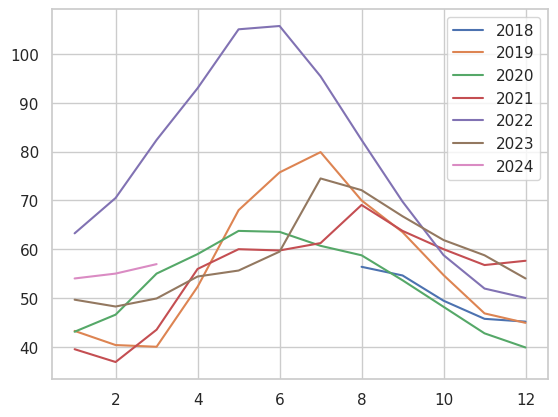

In [ ]:
dosmil18 = cityMeansYear[0]
dosmil19 = cityMeansYear[1]
dosmil20 = cityMeansYear[2]
dosmil21 = cityMeansYear[3]
dosmil22 = cityMeansYear[4]
dosmil23 = cityMeansYear[5]
dosmil24 = cityMeansYear[6]
median18 =  np.median(dosmil18, axis=0)
median19 =  np.median(dosmil19, axis=0)
median20 =  np.median(dosmil20, axis=0)
median21 =  np.median(dosmil21, axis=0)
median22 =  np.median(dosmil22, axis=0)
median23 =  np.median(dosmil23, axis=0)
median24 =  np.median(dosmil24, axis=0)

steps18=np.arange(8, 13, 1)
steps24=np.arange(1, 4, 1)
x=np.arange(1, 13, 1)
fig, ax = plt.subplots()
ax.plot(steps18, median18, label='2018')
ax.plot(x, median19, label='2019')
ax.plot(x, median20, label='2020')
ax.plot(x, median21, label='2021')
ax.plot(x, median22, label='2022')
ax.plot(x, median23, label='2023')
ax.plot(steps24, median24, label='2024')
plt.legend()

Es posible apreciar que en efecto existen tendencias estacionales, puesto que año con año, el precio del aguacate presenta un comportamiento a la alza durante los meses de medio año y vemos precios bajos a principio y fin de año

Consideremos ahora un enfoque distinto, en el cual observaremos los datos desde la perspectiva de los meses de cada año, en donde cada mes de cada año será una observación de dimensión 55 correspondiente a las medianas de cada ciudad.

In [ ]:
datos=pricesByYear.drop(columns=['Fecha_Pub_DOF', 'División', 'Clase', 'Subclase', 'Clave genérico', 'Cantidad', 'Unidad', 'Estatus', 'Especificación', 'Grupo', 'Genérico', 'Consecutivo', 'Nombre ciudad']).copy()
#datos.set_index(['Mes', 'Año'], inplace = True)
# Ahora, vamos a pivotar los datos para obtener la mediana de los precios promedio por mes y año
pivot_df = datos.pivot_table(index=['Año', 'Mes'], columns='Clave ciudad', values='Precio promedio', aggfunc='median').reset_index()
pivot_df.set_index(['Año','Mes'], inplace = True)
pivot_df.head()

Clave ciudad     1       2       3      4      5      6       7      8   \
Año  Mes                                                                  
2018 8        61.25  36.900  56.550  57.25  63.75  65.25  45.245  63.75   
     9        60.25  34.475  54.615  57.50  67.00  61.25  48.570  62.50   
     10       55.00  32.750  48.750  53.65  56.48  63.50  37.915  60.00   
     11       50.28  35.800  47.000  49.00  48.18  61.00  38.520  50.00   
     12       50.00  35.600  42.975  45.70  47.20  50.73  33.745  49.00   

Clave ciudad     9      10  ...     46      47     48      49     50     51  \
Año  Mes                    ...                                               
2018 8        59.23  52.68  ...  50.50  59.275  53.75  59.900  56.39  48.75   
     9        55.73  51.50  ...  46.65  55.625  53.75  53.125  52.11  49.15   
     10       53.60  53.40  ...  40.38  51.875  48.15  49.440  49.15  40.75   
     11       47.90  42.00  ...  37.61  49.500  46.93  48.750  41.90  39.61   
     12       46.95  43.25  ...  38.24  47.375  47.50  52.975  40.65  39.40   

Clave ciudad     52     53     54     55  
Año  Mes                                  
2018 8        56.44  54.25  50.25  59.00  
     9        55.75  52.85  52.50  53.58  
     10       51.25  40.50  45.00  49.13  
     11       48.75  36.00  41.25  42.25  
     12       48.50  38.65  31.25  42.00  

[5 rows x 55 columns]

Con los datos anteriores, procedamos a aplicar la técnica de reducción de dimensión T-SNE, con el objetivo de apreciar parentezcos entre los precios de los distintos meses, entre algunas otras características locales que nos permitan comprender el comportamiento de los precios.

In [ ]:
tsne = TSNE(n_components=2)
tsne_res = tsne.fit_transform(pivot_df)

In [ ]:
# Convertir los índices en una cadena
pivot_df.index = pivot_df.index.map(lambda x: '_'.join(map(str, x)))

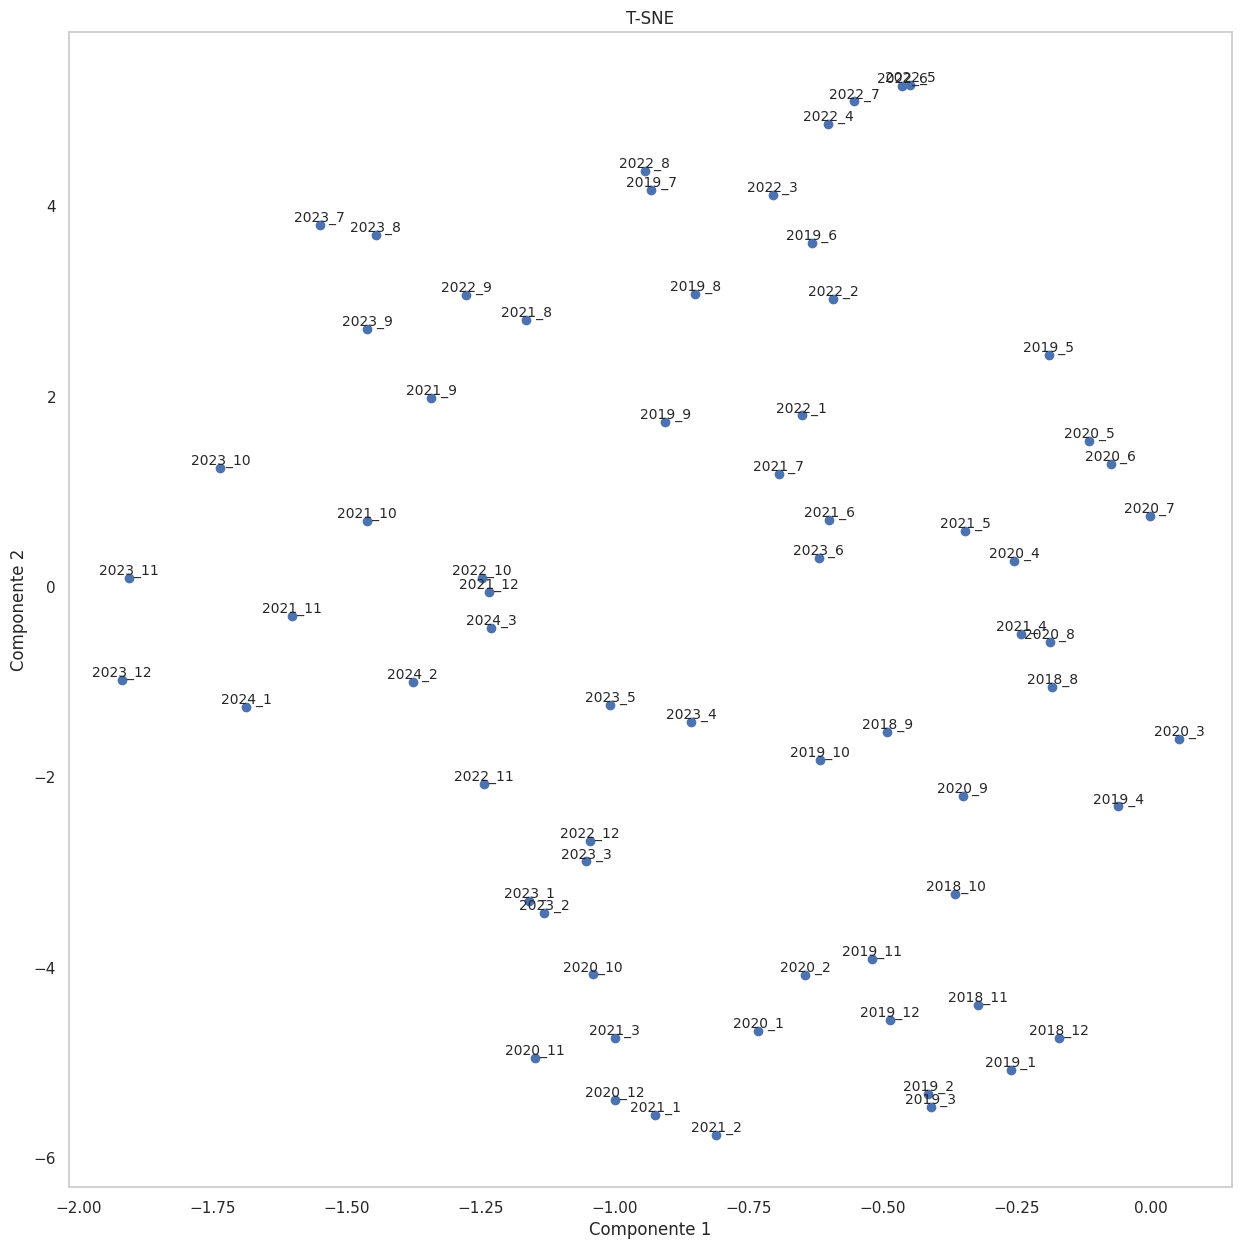

In [ ]:

# Crear el scatter plot
plt.figure(figsize=(15, 15))
plt.scatter(tsne_res[:, 0], tsne_res[:, 1])

# Agregar las etiquetas sobre los puntos
for i, año_mes in enumerate(pivot_df.index):
    plt.text(tsne_res[i, 0], tsne_res[i, 1], str(año_mes), fontsize=10, ha='center', va='bottom')

# Añadir etiquetas a los ejes y título
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('T-SNE')
plt.grid()
# Mostrar el gráfico
plt.show()

Podemos apreciar que los meses que se encuentran en el extremo derecho, son los pertenecientes a mediados del año 2022, los cuales anteriormente se evidenció que fueron en los que se alcanzaron precios históricamente altos, note que de esta manera, a diferencia del enfoque anterior sobre los años, podemos notar los contrastes entre los distintos meses, puesto que aunque se sabe que en el 2022 se alcanzaron altos precios, algunos meses de otros años no estuvieron exentos de contar con el mismo comportamiento, tal fue el caso de los meses de julio y agosto del 2023 y junio y agosto del 2019, donde ciertamente los precios se dispararon a niveles comparables con los máximos registrados para el 2022.
Ahora bien, procedamos a aplicar k-means y veamos si con dicha estrategia es posible capturar este comportamiento, pero antes, veamos qué tantos clusters es recomendable emplear según el siguiente Elbow plot.  

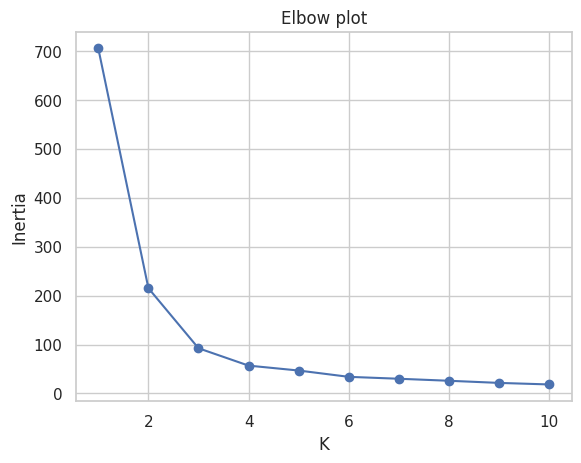

In [ ]:
# Elbow plot
x, y = [], []
for i in range(1, 11):
  km = KMeans(n_clusters = i, n_init = "auto")
  km.fit(tsne_res)
  x.append(i)
  y.append(km.inertia_)

plt.title("Elbow plot")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.plot(x, y, marker = 'o')

Por lo que es posible apreciar, emplear 4 clusters parece ser una buena elección, por lo que a continuación se muestran los resultados tras dicha consieración.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


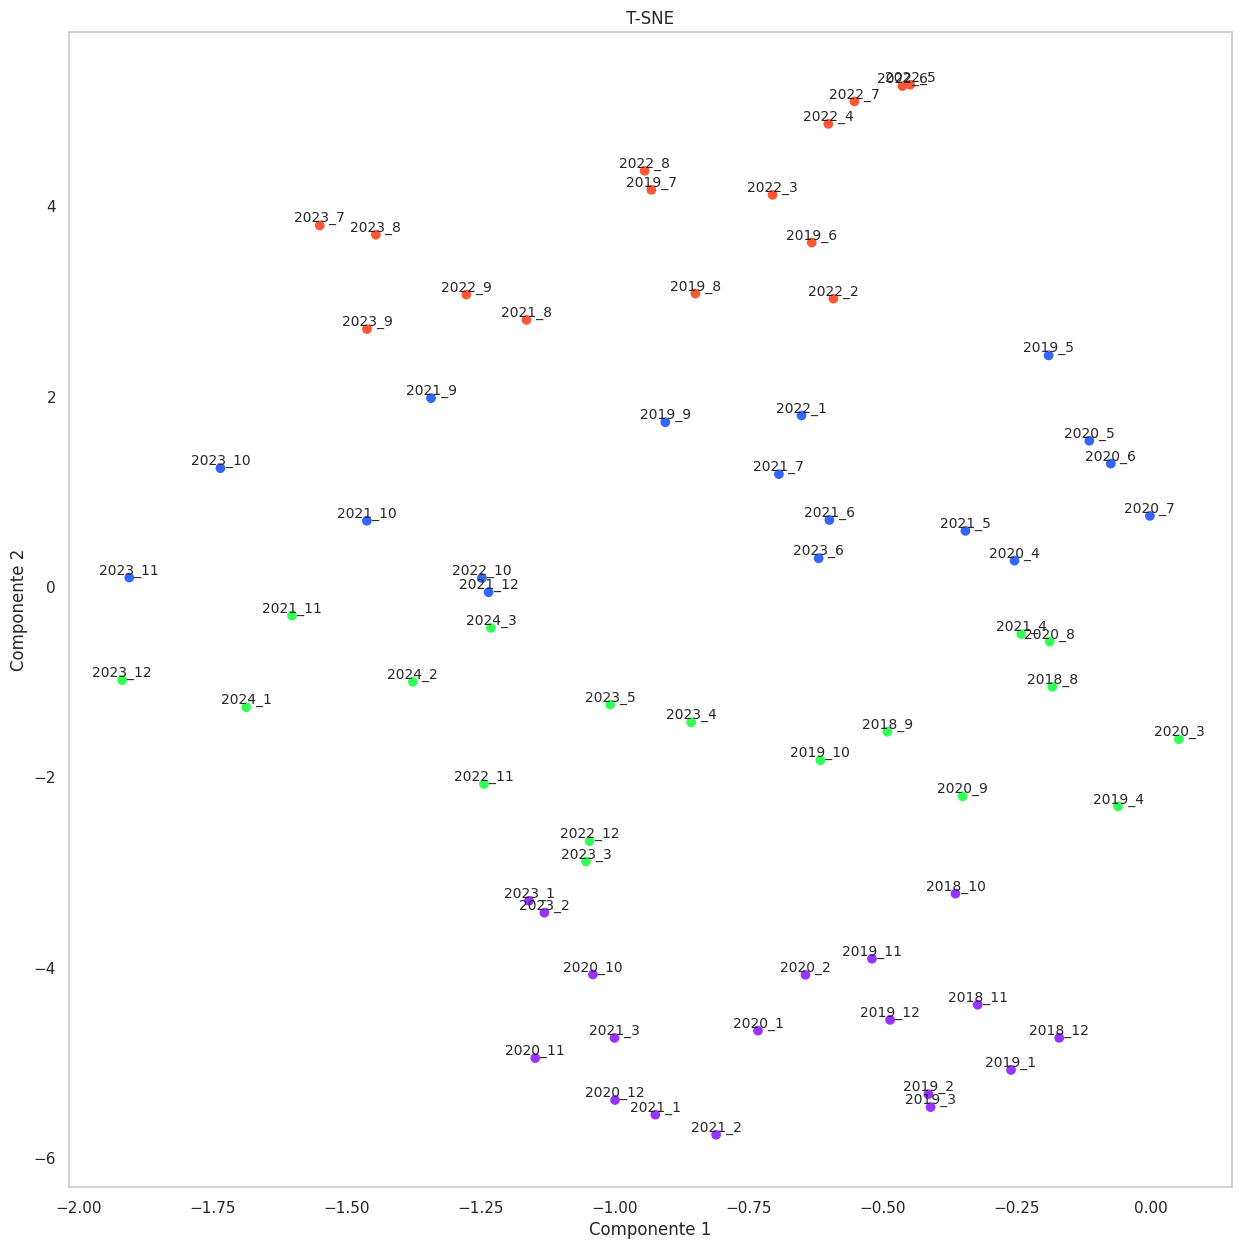

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

# Aplicamos el algoritmo de K-Medias
kmeans = KMeans(n_clusters=4)  # numero de clusters deseado
kmeans.fit(tsne_res)

# Obtenemos las etiquetas de cluster asignadas a cada estado
labels = kmeans.labels_

# Añadimos las etiquetas de cluster al dataframe original
#data['Cluster'] = labels


# Crear el scatter plot
colors= [
    "#FF5733",  # Rojo
    "#33FF57",  # Verde
    "#3366FF",  # Azul
    "#FF33EE",  # Rosa
    "#FFFF33",  # Amarillo
    "#33FFFF",  # Cian
    "#FF33CC",  # Magenta
    "#CC33FF",  # Púrpura
    "#33CCFF",  # Celeste
    "#FF9933",  # Naranja
    "#33FF99",  # Verde azulado
    "#9933FF"   # Morado
]
colorsPlot = []
for i in range(68):
    colorsPlot.append(colors[labels[i]-1])
plt.figure(figsize=(15, 15))
plt.scatter(tsne_res[:, 0], tsne_res[:, 1], c=colorsPlot)




# Agregar las etiquetas sobre los puntos
for i, año_mes in enumerate(pivot_df.index):
    plt.text(tsne_res[i, 0], tsne_res[i, 1], str(año_mes), fontsize=10, ha='center', va='bottom')

# Añadir etiquetas a los ejes y título
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('T-SNE')
plt.grid()
# Mostrar el gráfico
plt.show()

Donde note que efecto, la separación obtenida parece haber capturado las distintas gamas de precios, permitiéndonos distinguir de entre todos los meses, cuáles fueron los que se carazterizaron por tener los precios más bajos, los más altos y algunos puntos intermedios, note que si empleamos 10 clusters es posible obtener resultados más finos en el sentido descrito anteriormente.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


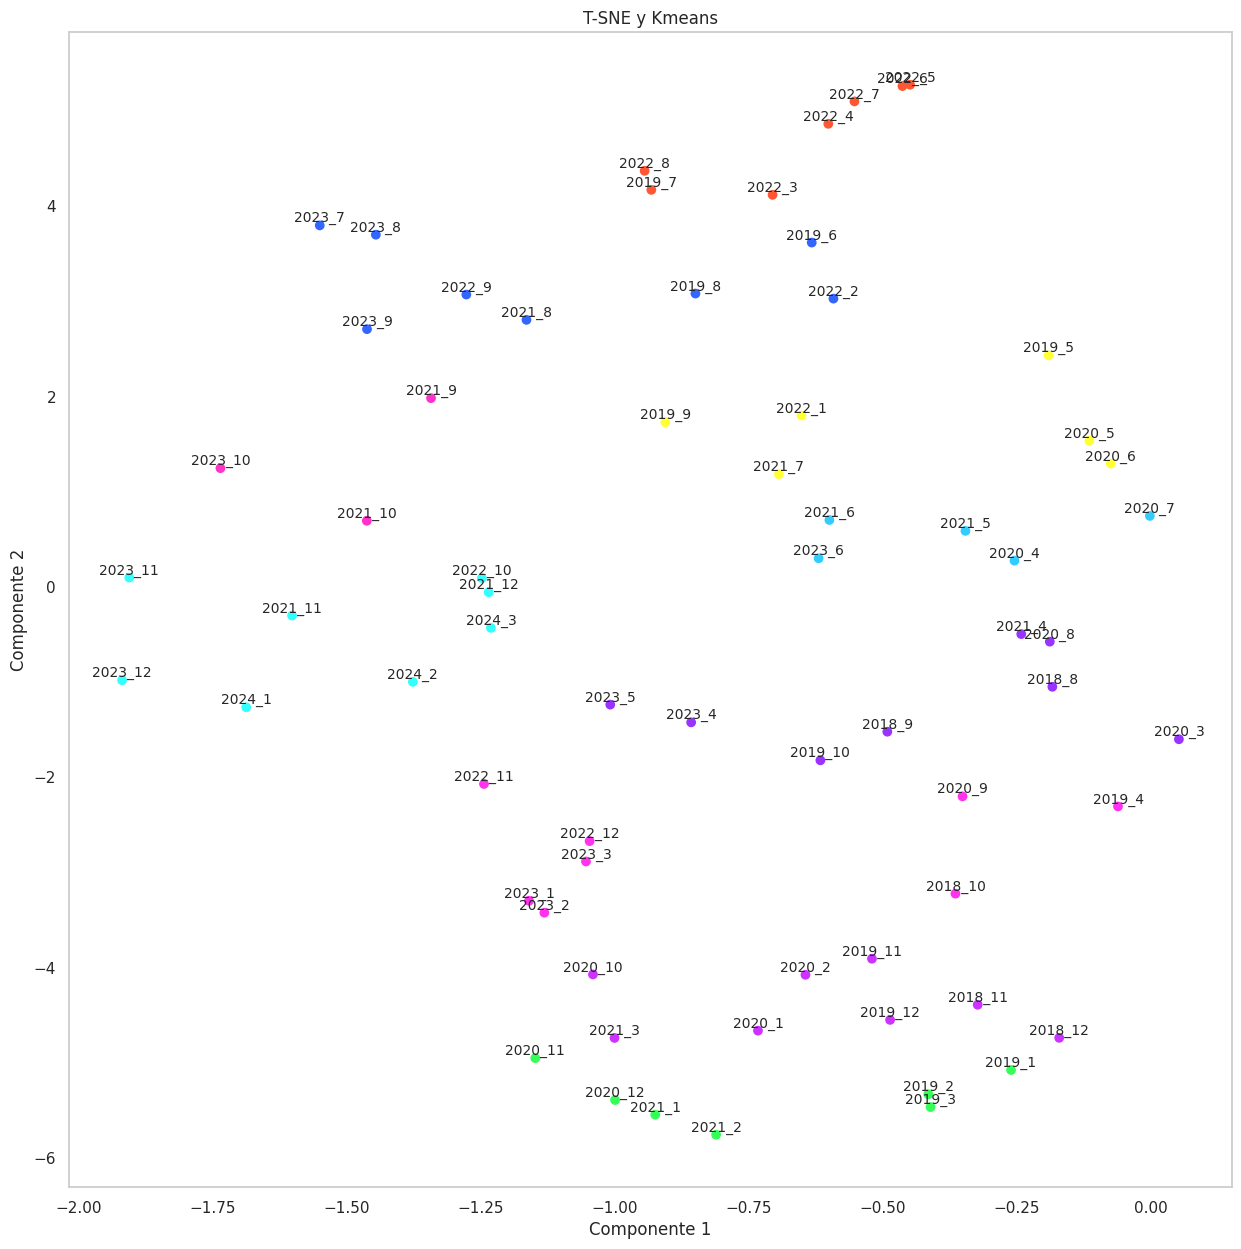

In [ ]:
kmeans = KMeans(n_clusters=10)  # numero de clusters deseado
kmeans.fit(tsne_res)

# Obtenemos las etiquetas de cluster asignadas a cada estado
labels = kmeans.labels_

# Añadimos las etiquetas de cluster al dataframe original
#data['Cluster'] = labels


# Crear el scatter plot
colors= [
    "#FF5733",  # Rojo
    "#33FF57",  # Verde
    "#3366FF",  # Azul
    "#FF33EE",  # Rosa
    "#FFFF33",  # Amarillo
    "#33FFFF",  # Cian
    "#FF33CC",  # Magenta
    "#CC33FF",  # Púrpura
    "#33CCFF",  # Celeste
    "#FF9933",  # Naranja
    "#33FF99",  # Verde azulado
    "#9933FF"   # Morado
]
colorsPlot = []
for i in range(68):
    colorsPlot.append(colors[labels[i]-1])
plt.figure(figsize=(15, 15))
plt.scatter(tsne_res[:, 0], tsne_res[:, 1], c=colorsPlot)




# Agregar las etiquetas sobre los puntos
for i, año_mes in enumerate(pivot_df.index):
    plt.text(tsne_res[i, 0], tsne_res[i, 1], str(año_mes), fontsize=10, ha='center', va='bottom')

# Añadir etiquetas a los ejes y título
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('T-SNE y Kmeans')
plt.grid()
# Mostrar el gráfico
plt.show()

Se puede entonces concluir que los meses con precios históricamente más baratos de los que se tiene registro en este análisis, son de noviembre del 2020 a febrero del 2021 y de enero a marzo del 2019, además podemos notar que en los últimos meses, el precio se ha mantenido en en el promedio.

# Conclusión
 A lo largo del análisis, fue posible evidenciar comportamientos particulares de los precios del aguacate a lo largo de los años entre 2018 y 2024, fue posible emplear distintas visualizaciones que fueron suficientemente informativas para encontrar anomalías en los precios y dependencias de los mismos entre las distintas ciudades, además de los patrones estacionales que han caracterizado los costos a lo largo de los últimos años, todo esto ha permitido comprender los patrones que describen las fluctuaciones del precio del aguacate y podrían ser entonces de interés para la toma de decisiones futuras o como herramientas para análisis posteriores, además cabe mencionar que las estrategias de reducción de dimensión fueron fundamentales para visualizar las evidencias y los algoritmos de agrupamiento se encargaron de confirmar las observaciones previas. Todo esto permitió responder afirmativamente a las cuestiones planteadas al principio del análisis.